# CREDIT EDA ASSIGNMENT

## Introduction

Objective is Indentify applicant's profile to benefit company

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

### Steps of Credit Data Analysis

Reading the Dataset into Notebook.

Check for Data imbalance.

Split the analysis into small segments using individaul feature along with target or correlation multiple features with Target.

Data Cleaning, Missing Data Handling, Type casting are done segment wise.

Perform Data Visualization segment-wise as well.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set seaborn Style
plt.style.use('seaborn-pastel')
%matplotlib inline

READING DATA TO NOTEBOOK

In [3]:
# 'application_data.csv'  contains all the information of the client at the time of application.
# The data is about whether a client has payment difficulties.

In [4]:
#Reading data to notebook
app_data = pd.read_csv("application_data.csv")
prev_app_data = pd.read_csv("previous_application.csv")

First Let's Analysis "application_data.csv"

In [5]:
#Trying to understand data
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
print(app_data.shape)
print(f'Now we have {app_data.shape[1]-1} features columns, 1 target column, and {app_data.shape[0]} rows')

(307511, 122)
Now we have 121 features columns, 1 target column, and 307511 rows


# Data Cleaning

Let's try to remove columns which are having high percentage value of missing values

In [8]:
#Find percentage of missing values for each column.
app_data.isnull().sum() * 100 / len(app_data)

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [9]:
#Find out Columns with missing value more than 50%
missing_value_per = app_data.isnull().sum() * 100 / len(app_data)
missing_value_app_data = pd.DataFrame({'column_name': app_data.columns,
                                 'percent_missing_value': missing_value_per})
missing_val_list_50 = list(missing_value_app_data[missing_value_app_data.percent_missing_value > 50].column_name)
missing_val_list_50

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

As you can see above are list of columns having missing value more the 50%. Which can't be imputed with value to best of our abilities. 

So, Let's drop them

In [10]:
# Dropping all columns whose missing value percentage is more than 50%
app_data.drop(missing_val_list_50, axis = 1, inplace = True)

In [11]:
print(app_data.shape)
print(f'Now we have {app_data.shape[1]-1} features columns, 1 target column, and {app_data.shape[0]} rows')

(307511, 81)
Now we have 80 features columns, 1 target column, and 307511 rows


Similar Let's check for columns whose missing value is less than 0.05 % and drop rows having those missing values, Because it would not effect our analysis much.

In [12]:
#Find out Colums with missing value more than less then 0.05%
missing_value_per = app_data.isnull().sum() * 100 / len(app_data)
missing_value_app_data = pd.DataFrame({'column_name': app_data.columns,
                                 'percent_missing_value': missing_value_per})
missing_val_list_005 = list(missing_value_app_data[(missing_value_app_data.percent_missing_value > 0) & (missing_value_app_data.percent_missing_value < 0.05)].column_name)
missing_val_list_005

['AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']

As we can see ['AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE'] have nearly 0.05 % of missing value lets drop those rows

In [13]:
#Dropping rows for above mentioned 0.05 % missing value coulmn
app_data = app_data[~(app_data['AMT_ANNUITY'].isna())]
app_data = app_data[~(app_data['CNT_FAM_MEMBERS'].isna())]
app_data = app_data[~(app_data['DAYS_LAST_PHONE_CHANGE'].isna())]

In [14]:
#Find out Columns with missing value
missing_value_per = app_data.isnull().sum() * 100 / len(app_data)
missing_value_app_data = pd.DataFrame({'column_name': app_data.columns,
                                 'percent_missing_value': missing_value_per})
missing_val_list_00 = list(missing_value_app_data[missing_value_app_data.percent_missing_value > 00].column_name)
missing_val_list_00

['AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'EMERGENCYSTATE_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [15]:
#Fixing 'AMT_GOODS_PRICE' missing values.
app_data.AMT_GOODS_PRICE = app_data.AMT_GOODS_PRICE.fillna(app_data.AMT_GOODS_PRICE.mode()[0])
#check for missing value sum after replacing missing values
app_data.AMT_GOODS_PRICE.isna().sum()

0

In [16]:
#Fixing 'NAME_TYPE_SUITE' missing values.
app_data['NAME_TYPE_SUITE'] = app_data['NAME_TYPE_SUITE'].fillna(app_data['NAME_TYPE_SUITE'].mode()[0])
#check for missing value sum after replacing missing values
app_data['NAME_TYPE_SUITE'].isna().sum()

0

In [17]:
#Fixing 'EXT_SOURCE_2' missing values.
app_data['EXT_SOURCE_2'] = app_data['EXT_SOURCE_2'].fillna(app_data['EXT_SOURCE_2'].mode()[0])
#check for missing value sum after replacing missing values
app_data['EXT_SOURCE_2'].isna().sum()

0

In [18]:
#Fixing 'DEF_30_CNT_SOCIAL_CIRCLE' missing values.
app_data['DEF_30_CNT_SOCIAL_CIRCLE'] = app_data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(app_data['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0])
#check for missing value sum after replacing missing values
app_data['DEF_30_CNT_SOCIAL_CIRCLE'].isna().sum()

0

In [19]:
#Fixing 'EXT_SOURCE_3' missing values.
app_data['EXT_SOURCE_3'] = app_data['EXT_SOURCE_3'].fillna(app_data['EXT_SOURCE_3'].mode()[0])
#check for missing value sum after replacing missing values
app_data['EXT_SOURCE_3'].isna().sum()

0

In [20]:
#Fixing 'EXT_SOURCE_3' missing values.
app_data['DEF_60_CNT_SOCIAL_CIRCLE'] = app_data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(app_data['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0])
#check for missing value sum after replacing missing values
app_data['DEF_60_CNT_SOCIAL_CIRCLE'].isna().sum()

0

In [21]:
#fixing 'AMT_REQ_CREDIT_BUREAU_HOUR' missing values.
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'] = app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0])
#check for missing value sum after replacing missing values
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isna().sum()

0

In [22]:
#fixing 'AMT_REQ_CREDIT_BUREAU_DAY' missing values.
app_data['AMT_REQ_CREDIT_BUREAU_DAY'] = app_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0])
#check for missing value sum after replacing missing values
app_data['AMT_REQ_CREDIT_BUREAU_DAY'].isna().sum()

0

In [23]:
#fixing 'AMT_REQ_CREDIT_BUREAU_MON' missing values.
app_data['AMT_REQ_CREDIT_BUREAU_MON'] = app_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0])
#check for missing value sum after replacing missing values
app_data['AMT_REQ_CREDIT_BUREAU_MON'].isna().sum()

0

In [24]:
#fixing 'AMT_REQ_CREDIT_BUREAU_QRT' missing values.
app_data['AMT_REQ_CREDIT_BUREAU_QRT'] = app_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0])
#check for missing value sum after replacing missing values
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].isna().sum()

0

In [25]:
#fixing 'AMT_REQ_CREDIT_BUREAU_YEAR' missing values.
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'] = app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0])
#check for missing value sum after replacing missing values
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].isna().sum()

0

In [26]:
#fixing 'AMT_REQ_CREDIT_BUREAU_WEEK' missing values.
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'] = app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0])
#check for missing value sum after replacing missing values
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].isna().sum()

0

In [27]:
#fixing 'OCCUPATION_TYPE' missing values.
app_data['OCCUPATION_TYPE'] = app_data['OCCUPATION_TYPE'].fillna('Unknown')
#check for missing value sum after replacing missing values
app_data['OCCUPATION_TYPE'].isna().sum()

0

In [28]:
#Find out Columns with missing values
missing_value_per = app_data.isnull().sum() * 100 / len(app_data)
missing_value_app_data = pd.DataFrame({'column_name': app_data.columns,
                                 'percent_missing_value': missing_value_per})
missing_val_list_00 = list(missing_value_app_data[missing_value_app_data.percent_missing_value > 00].column_name)
missing_val_list_00

['YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'EMERGENCYSTATE_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE']

Going Further we are dropping them. not now

In [29]:
print(app_data.shape)
print(f'Now we have {app_data.shape[1]-1} features columns, 1 target column, and {app_data.shape[0]} rows')

(307496, 81)
Now we have 80 features columns, 1 target column, and 307496 rows


## Now let's try to understand how data is balanced based on TARGET.
## TARGET = '1' means Defaulter, TARGET = '0' means Non-Defaulter

No. of non-defaulters:  282671
No. of defaulters:  24825


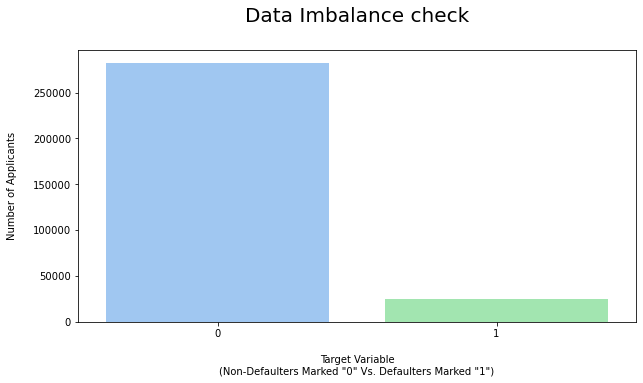

In [30]:
print("No. of non-defaulters: ", app_data[app_data["TARGET"] == 0].shape[0])
print("No. of defaulters: ", app_data[app_data["TARGET"] == 1].shape[0])

fig = plt.figure(figsize=(10,5))

plt.title('Data Imbalance check\n', size = 20)

sns.countplot(app_data['TARGET']).set(ylabel="Number of Applicants\n",
                                      xlabel = ('\nTarget Variable\n(Non-Defaulters Marked "0" Vs. Defaulters Marked "1")'))
plt.show()

In [31]:
print("Percentage of defaulters: ", app_data[app_data["TARGET"] == 1].shape[0]*100/(app_data[app_data["TARGET"] == 1].shape[0]+app_data[app_data["TARGET"] == 0].shape[0]))
print("Percentage of Non - defaulters: ", app_data[app_data["TARGET"] == 0].shape[0]*100/(app_data[app_data["TARGET"] == 1].shape[0]+app_data[app_data["TARGET"] == 0].shape[0]))

Percentage of defaulters:  8.073275749928454
Percentage of Non - defaulters:  91.92672425007154


As we can see in above bar Plot Data is highly imbalance The Ratio between deflauters and Non-deflauters is nearly 8:92.
Suggesting us to analysis it seperately

In [32]:
non_defaultor  = app_data[app_data["TARGET"] == 0]
defaultor  = app_data[app_data["TARGET"] == 1]

Let's Analysis to drop more columns which are similar in details and not usefull for analysis

In [33]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

Let's check with Document columns

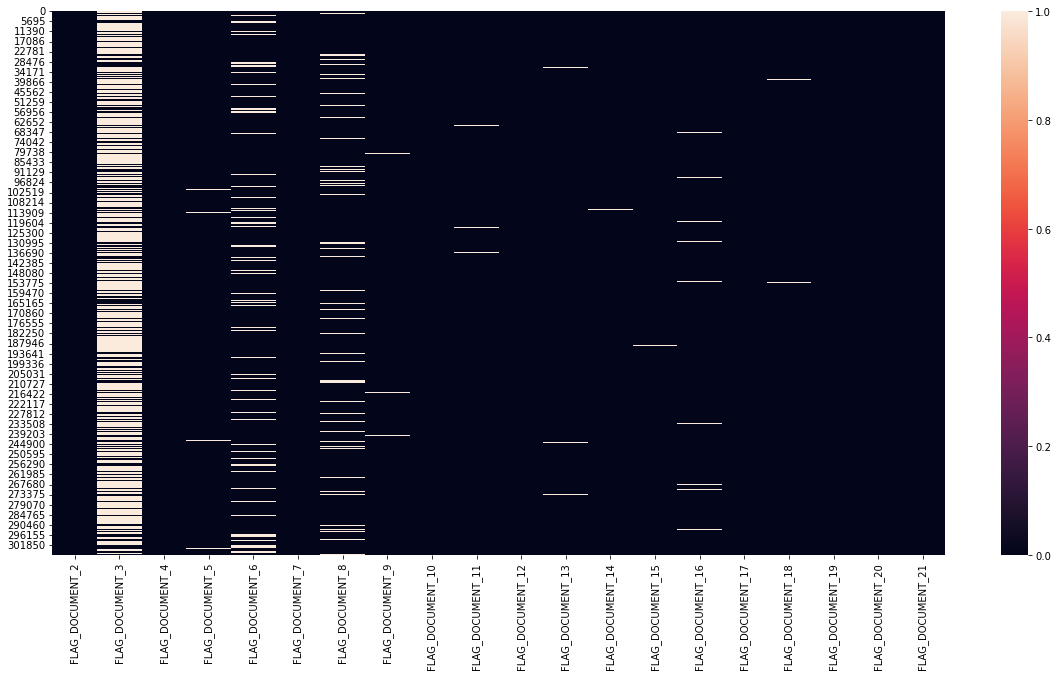

In [34]:
plt.figure(figsize=(20, 10))
sns.heatmap(app_data.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'])
plt.show()

Above heatmap suggest that all Documents apart from FLAG_DOCUMNTS_3 are not provided by applicants so those wouldn't help us in Analysis

Let's drop them

In [35]:
app_data.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'], axis = 1, inplace = True) 

In [36]:
print(app_data.shape)
print(f'Now we have {app_data.shape[1]-1} features columns, 1 target column, and {app_data.shape[0]} rows')

(307496, 62)
Now we have 61 features columns, 1 target column, and 307496 rows


Let's Analysis FLAG_DOCUMENT_3 with repect to both Defaultor and Non-Defaulters

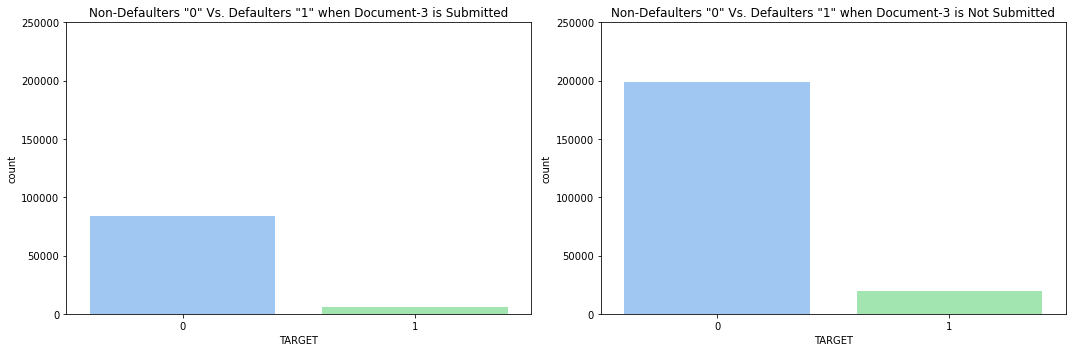

In [37]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,250000), title='Non-Defaulters "0" Vs. Defaulters "1" when Document-3 is Submitted')
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,250000), title='Non-Defaulters "0" Vs. Defaulters "1" when Document-3 is Not Submitted')

sns.countplot(app_data[app_data["FLAG_DOCUMENT_3"] == 0]["TARGET"], ax=ax1)
sns.countplot(app_data[app_data["FLAG_DOCUMENT_3"] == 1]["TARGET"], ax=ax2)

plt.tight_layout()

plt.show()

In both cases where documents are submitted and not submitted we can see rate of Non-deflauters is higher than deflauters having similar pattern in both case. So we can drop FLAG_DOCUMENT_3 column

In [38]:
#dropping FLAG_DOCUMENT_3 columns
app_data.drop(["FLAG_DOCUMENT_3"], axis = 1, inplace = True)

As we can see there are features related to house of application which would not play major role in analysis. Please note few are already removed when we checked missing values more then 50% we can drop them all

In [39]:
#dropping columns related to house propeties
app_data.drop(['YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'EMERGENCYSTATE_MODE'], axis = 1, inplace = True) 

In [40]:
print(app_data.shape)
print(f'Now we have {app_data.shape[1]-1} features columns, 1 target column, and {app_data.shape[0]} rows')

(307496, 53)
Now we have 52 features columns, 1 target column, and 307496 rows


In [41]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

## ANALYSIS 1

Let's Analysis NAME_HOUSING_TYPE column

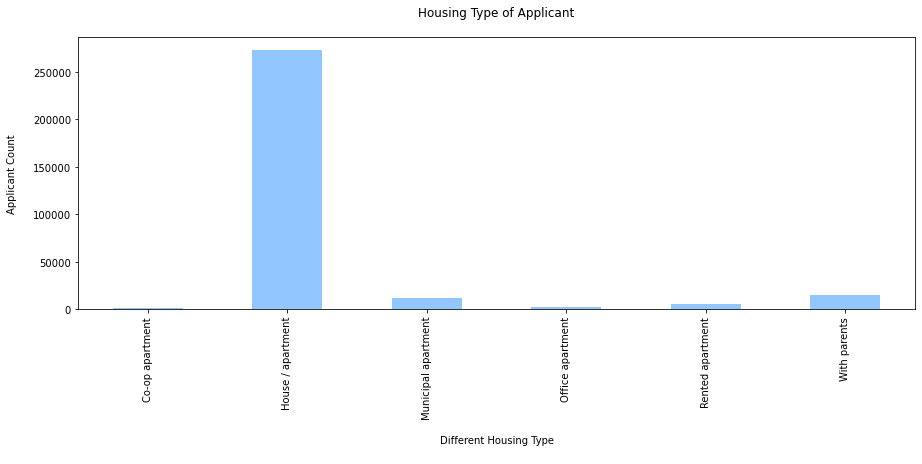

In [42]:
#Identify most common housing Type of Applicant
plt.figure(figsize=(15,5))
plt.title("Housing Type of Applicant\n")
app_data.groupby("NAME_HOUSING_TYPE")["TARGET"].count().plot.bar()
plt.xlabel("\nDifferent Housing Type\n")
plt.ylabel("Applicant Count\n")
plt.show()

Most of the applicants live in House/Apartment

Percentage of defaulters with respect to each NAME_HOUSING_TYPE : 
 NAME_HOUSING_TYPE
Rented apartment       0.123156
With parents           0.116981
Municipal apartment    0.085413
Co-op apartment        0.079323
House / apartment      0.077961
Office apartment       0.065724
Name: TARGET, dtype: float64


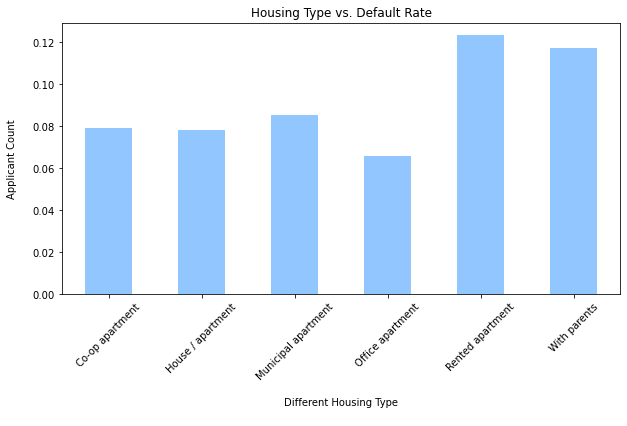

In [43]:
#Identify housing Type of having highest defaulter rate
plt.figure(figsize=(10,5))
plt.title("Housing Type vs. Default Rate")
app_data.groupby("NAME_HOUSING_TYPE")["TARGET"].mean().plot.bar().set_xticklabels(list(app_data.groupby("NAME_HOUSING_TYPE")["TARGET"].mean().index),rotation = 45)
plt.xlabel("\nDifferent Housing Type\n")
plt.ylabel("Applicant Count\n")
print("Percentage of defaulters with respect to each NAME_HOUSING_TYPE : \n",
      app_data.groupby("NAME_HOUSING_TYPE")["TARGET"].mean().sort_values(ascending = False))
plt.show()

#### Take away point 1:
1. Applicants living With parents and in Rented apartment have higher Default rate.
2. Applicant living in Office apartment have less Default Rate.

### Let's Analysis SOCIAL_CIRCLE columns

In [44]:
#Determine Start and End Index value of SOCIAL_CIRCLE columns
start_index = app_data.columns.get_loc('OBS_30_CNT_SOCIAL_CIRCLE')
end_index = app_data.columns.get_loc('DEF_60_CNT_SOCIAL_CIRCLE')

social_circle = app_data.iloc[:, start_index:end_index+1]

<AxesSubplot:>

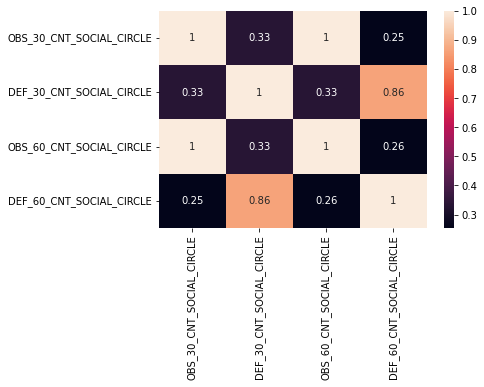

In [45]:
#Plot heatmap to understand correlation between all SOCIAL_CIRCLE columns
sns.heatmap(social_circle.corr(), annot=True)

1. DEF_30_CNT_SOCIAL_CIRCLE & DEF_60_CNT_SOCIAL_CIRCLE are highly correlated (correlation of 0.86).
2. OBS_30_CNT_SOCIAL_CIRCLE & OBS_60_CNT_SOCIAL_CIRCLE are identical column (correlation of 1), So one can be removed.

In [46]:
#Dropping OBS_30_CNT_SOCIAL_CIRCLE column
app_data.drop(["OBS_30_CNT_SOCIAL_CIRCLE"], axis = 1, inplace = True)

### Let's Analysis DEF_60_CNT_SOCIAL_CIRCLE & OBS_60_CNT_SOCIAL_CIRCLE having correlation of 0.26

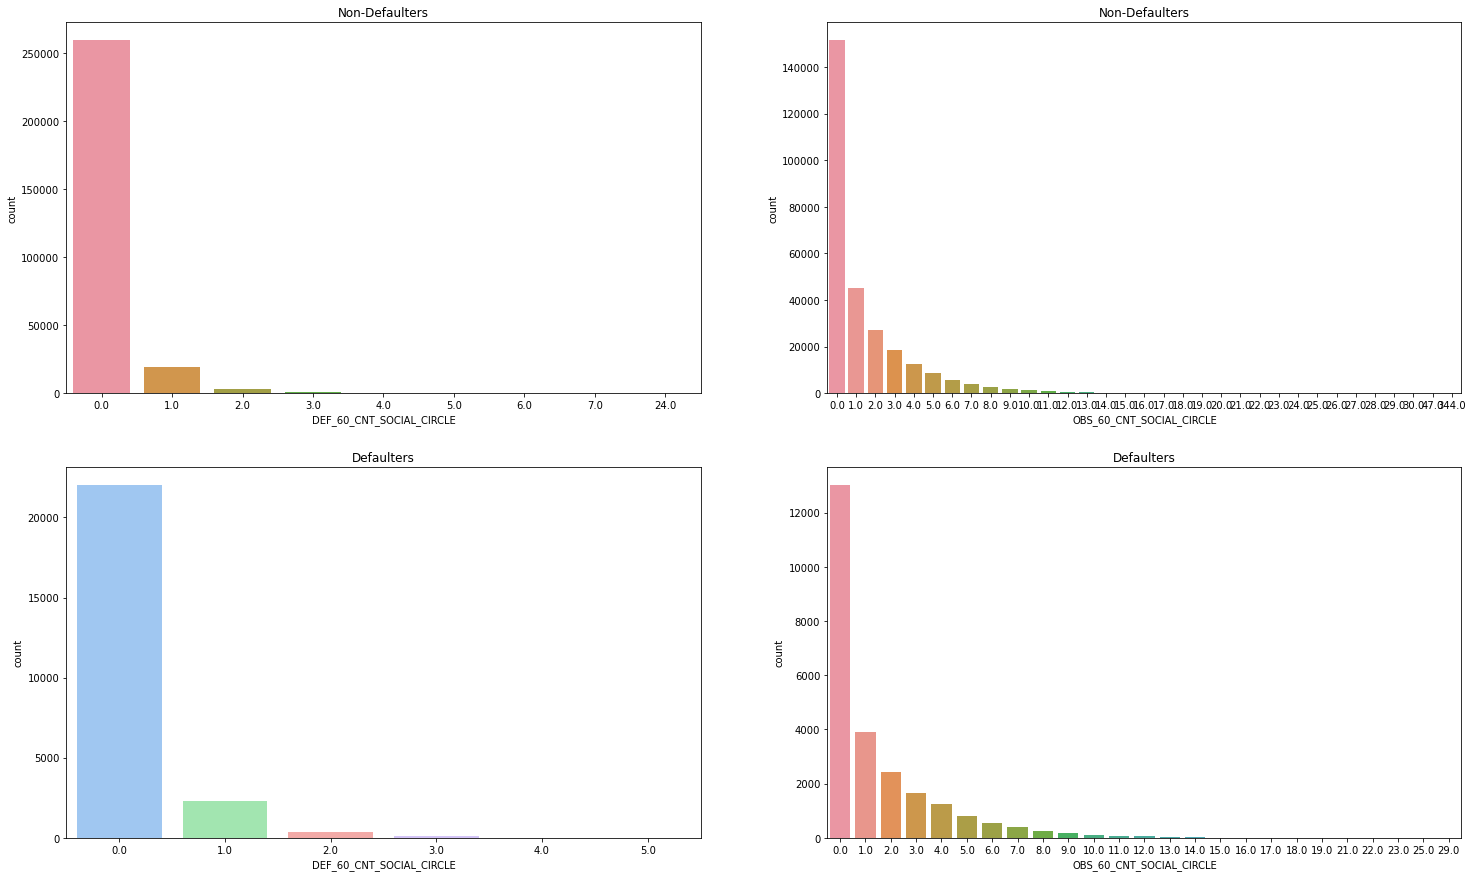

In [47]:
fig = plt.figure(figsize=(25,15))

ax1 = fig.add_subplot(2, 2, 1,  title='Non-Defaulters')
ax2 = fig.add_subplot(2, 2, 2, title='Non-Defaulters')
ax3 = fig.add_subplot(2, 2, 3,  title='Defaulters')
ax4 = fig.add_subplot(2, 2, 4, title='Defaulters')

sns.countplot(non_defaultor['DEF_60_CNT_SOCIAL_CIRCLE'], ax=ax1)
sns.countplot(non_defaultor['OBS_60_CNT_SOCIAL_CIRCLE'], ax=ax2)
print("\n\n")

sns.countplot(defaultor['DEF_60_CNT_SOCIAL_CIRCLE'], ax=ax3)
sns.countplot(defaultor['OBS_60_CNT_SOCIAL_CIRCLE'], ax=ax4)

plt.show()

In both case defaulter and Non-defaulter DEF_60_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE have similar tendence So one can be dropped

In [48]:
#dropping OBS_60_CNT_SOCIAL_CIRCLE column
app_data.drop(["OBS_60_CNT_SOCIAL_CIRCLE"], axis = 1, inplace = True)

In [49]:
print(app_data.shape)
print(f'Now we have {app_data.shape[1]-1} features columns, 1 target column, and {app_data.shape[0]} rows')

(307496, 51)
Now we have 50 features columns, 1 target column, and 307496 rows


# Analysis 2

## Let's Analysis Region columns

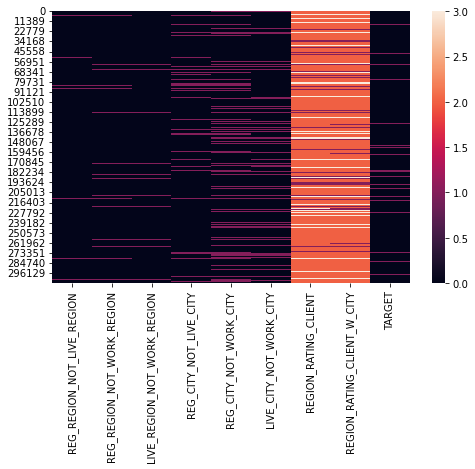

In [50]:
app_data_region = app_data.loc[:,'REG_REGION_NOT_LIVE_REGION':'LIVE_CITY_NOT_WORK_CITY']
app_data_region['REGION_RATING_CLIENT'] = app_data['REGION_RATING_CLIENT']
app_data_region['REGION_RATING_CLIENT_W_CITY'] = app_data['REGION_RATING_CLIENT_W_CITY']
app_data_region["TARGET"] = app_data["TARGET"]

plt.figure(figsize=(8, 5))
sns.heatmap(app_data_region)
plt.show()

REG_REGION_NOT_LIVE_REGION indicates most of the time the applicate is in live address provided so it can
be droped because it doesn't give relation between Non-defaulter and Defaulter

In [51]:
#dropping REG_REGION_NOT_LIVE_REGION
app_data.drop(["REG_REGION_NOT_LIVE_REGION"], axis = 1, inplace = True)

columns 'REG_REGION_NOT_WORK_REGION' & 'LIVE_REGION_NOT_WORK_REGION' looks identical can drop one

In [52]:
#dropping REG_REGION_NOT_WORK_REGION
app_data.drop(['REG_REGION_NOT_WORK_REGION'], axis = 1, inplace = True)

Columns 'REG_CITY_NOT_WORK_CITY' & 'LIVE_CITY_NOT_WORK_CITY'  looks identical can drop one

In [53]:
#dropping REG_CITY_NOT_WORK_CITY
app_data.drop(['REG_CITY_NOT_WORK_CITY'], axis = 1, inplace = True)

Columns 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY' looks identical can drop one

In [54]:
#dropping REGION_RATING_CLIENT
app_data.drop(['REGION_RATING_CLIENT'], axis = 1, inplace = True)

In [55]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_R

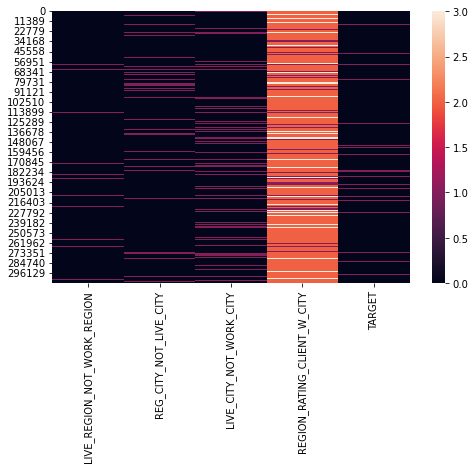

In [56]:
app_data_region = app_data.loc[:,'LIVE_REGION_NOT_WORK_REGION':'LIVE_CITY_NOT_WORK_CITY']
app_data_region['REGION_RATING_CLIENT_W_CITY'] = app_data['REGION_RATING_CLIENT_W_CITY']
app_data_region["TARGET"] = app_data["TARGET"]

plt.figure(figsize=(8, 5))
sns.heatmap(app_data_region)
plt.show()

In [57]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_R

In [58]:
print(app_data.shape)
print(f'Now we have {app_data.shape[1]-1} features columns, 1 target column, and {app_data.shape[0]} rows')

(307496, 47)
Now we have 46 features columns, 1 target column, and 307496 rows


<AxesSubplot:title={'center':'REGION_RATING_CLIENT_W_CITY Vs. TARGET \n'}, xlabel='REGION_RATING_CLIENT_W_CITY', ylabel='count'>

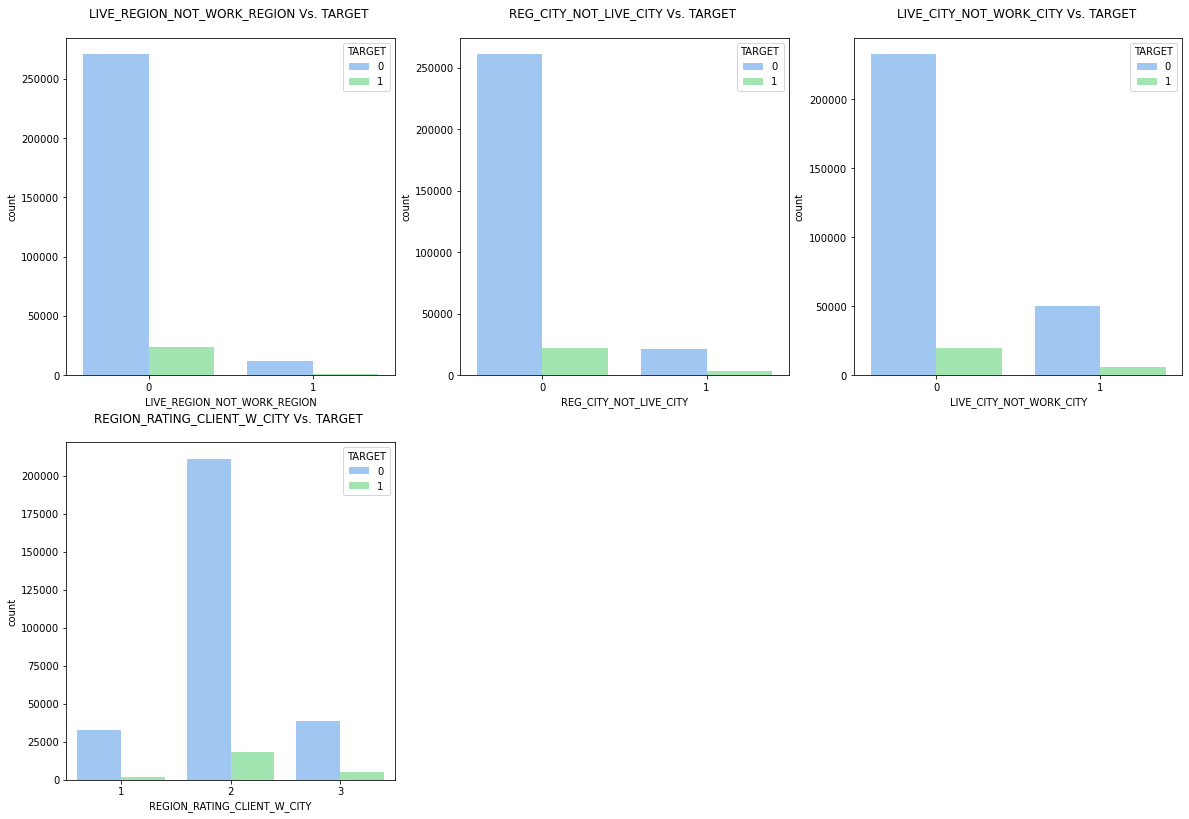

In [59]:
#Let's plot bar for all Region left out with respect to Target value.
fig = plt.figure(figsize=(20,36))

ax1 = fig.add_subplot(5, 3, 1,  title='LIVE_REGION_NOT_WORK_REGION Vs. TARGET \n')
ax2 = fig.add_subplot(5, 3, 2, title='REG_CITY_NOT_LIVE_CITY Vs. TARGET \n')
ax3 = fig.add_subplot(5, 3, 3,  title='LIVE_CITY_NOT_WORK_CITY Vs. TARGET \n')
ax4 = fig.add_subplot(5, 3, 4, title='REGION_RATING_CLIENT_W_CITY Vs. TARGET \n')
sns.countplot(x = app_data['LIVE_REGION_NOT_WORK_REGION'],  hue =app_data["TARGET"], ax=ax1)
sns.countplot(x = app_data['REG_CITY_NOT_LIVE_CITY'],  hue =app_data["TARGET"], ax=ax2)
sns.countplot(x = app_data['LIVE_CITY_NOT_WORK_CITY'],  hue =app_data["TARGET"], ax=ax3)
sns.countplot(x = app_data['REGION_RATING_CLIENT_W_CITY'],  hue =app_data["TARGET"], ax=ax4)



#### Take away point 2:
1. When client's contact address does not match work address defaulter rate is high. Also, Region 2 defined by company doesn't has high defaulters.
2. Region 1 defined by company doesn't has less defaulters

# Analysis 3

##  Let's Analysis Contact Data column

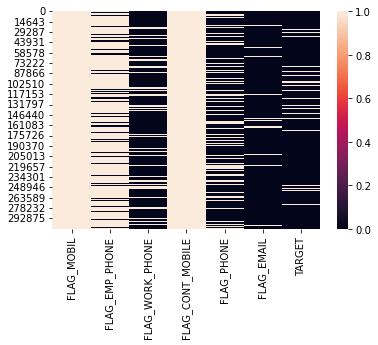

In [60]:
contact_data = app_data.loc[:,'FLAG_MOBIL':'FLAG_EMAIL']
contact_data['TARGET'] = app_data['TARGET']
plt.figure()
sns.heatmap(contact_data)
plt.show()

Comparing to TARGET values non of contact information has a pattern so we can drop all of them

In [61]:
#dropping contact details columns checked above
app_data.drop([ 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL'], axis = 1, inplace = True)

In [62]:
print(app_data.shape)
print(f'Now we have {app_data.shape[1]-1} features columns, 1 target column, and {app_data.shape[0]} rows')

(307496, 41)
Now we have 40 features columns, 1 target column, and 307496 rows


# Analysis 4

## Let's Analysis Applicate_assets Column

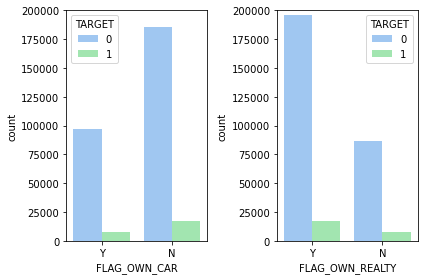

In [63]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,200000))
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,200000))

sns.countplot(app_data['FLAG_OWN_CAR'], hue=app_data['TARGET'], order=['Y','N'], ax=ax1)
sns.countplot(app_data['FLAG_OWN_REALTY'], hue=app_data['TARGET'], order=['Y','N'], ax=ax2)

plt.tight_layout()

plt.show()

Mostly applicate don't own CAR and own REALTY

#### Take away point 4: 
1. Applicant who don't own a CAR and own a REALTY tend to have higher default rate

# Analysis 5

## Let's Analysis NAME_FAMILY_STATUS Column

NAME_FAMILY_STATUS
Civil marriage           29773
Married                 196424
Separated                19770
Single / not married     45441
Widow                    16088
Name: TARGET, dtype: int64

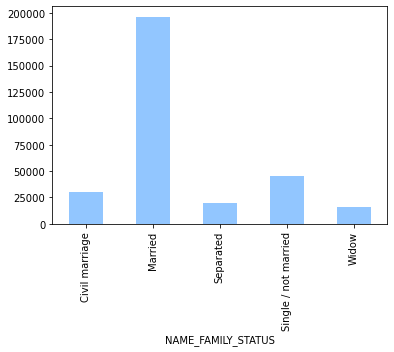

In [64]:
# Let's check for total applicant from different Family status
app_data.groupby("NAME_FAMILY_STATUS")["TARGET"].count().plot.bar()
app_data.groupby("NAME_FAMILY_STATUS")["TARGET"].count()

Most of Applicate are Married

NAME_FAMILY_STATUS
Civil marriage          0.099453
Single / not married    0.098083
Separated               0.081942
Married                 0.075602
Widow                   0.058242
Name: TARGET, dtype: float64

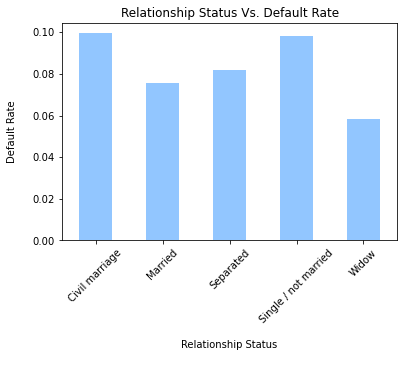

In [65]:
#Let's check for default rate based on Family Status
app_data.groupby("NAME_FAMILY_STATUS")["TARGET"].mean().plot.bar().set_xticklabels(list(app_data.groupby("NAME_FAMILY_STATUS")["TARGET"].mean().index),rotation = 45)
plt.title("Relationship Status Vs. Default Rate")
#plt.set_xtick( rotation = 45)
plt.ylabel("Default Rate\n")
plt.xlabel("\nRelationship Status\n")
app_data.groupby("NAME_FAMILY_STATUS")["TARGET"].mean().sort_values(ascending =False)

#### Take away point 5: 
Default rate is high for Civil marriage and Single / not married

# Analysis 6

## Let's Analysis CNT_CHILDREN and CNT_FAM_MEMBERS  Columns

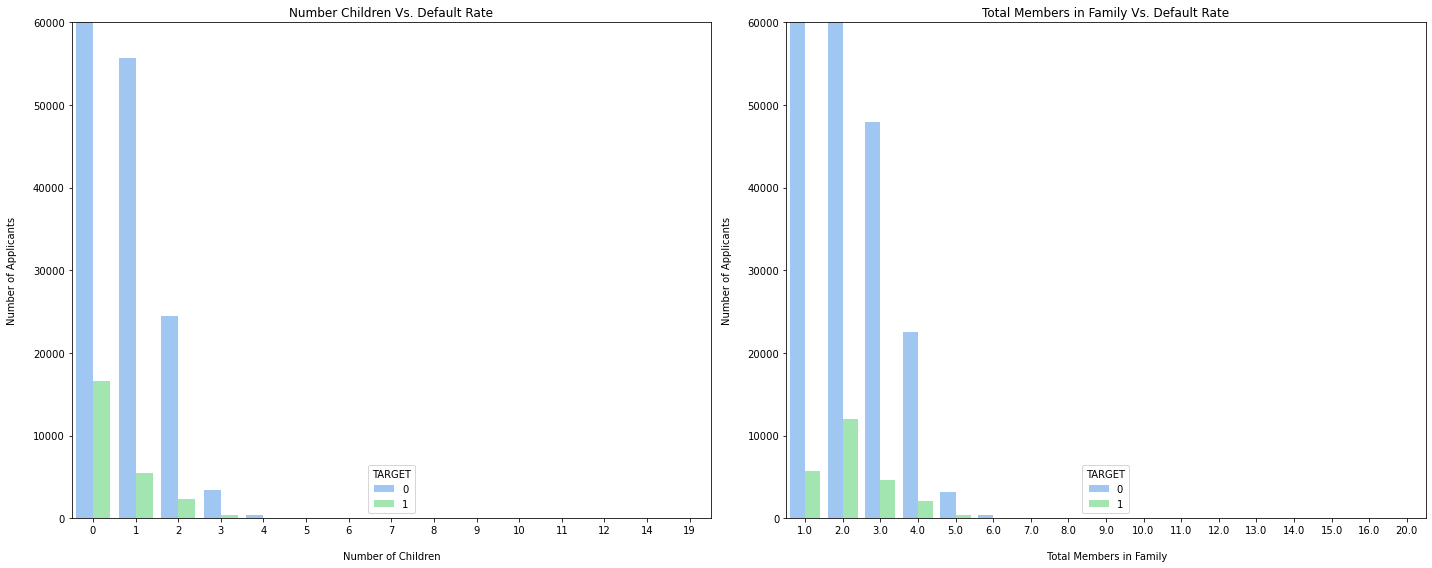

In [66]:
fig = plt.figure(figsize = (20,8))

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,60000), title="Number Children Vs. Default Rate")
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,60000), title="Total Members in Family Vs. Default Rate")

sns.countplot(app_data['CNT_CHILDREN'], hue=app_data["TARGET"], ax=ax1).set(ylabel="Number of Applicants\n",
                                      xlabel = ('\nNumber of Children'))
sns.countplot(app_data['CNT_FAM_MEMBERS'], hue=app_data["TARGET"], ax=ax2).set(ylabel="Number of Applicants\n",
                                      xlabel = ('\n Total Members in Family'))


plt.tight_layout()

plt.show()

#### Take away point 6: 
1. Applicant having no Children tend to have high default rate. 
2. Applicant having family member count 2 tend to have high default rate (Mostly just couples).

# Analysis 7

## Let's Analysis OCCUPATION_TYPE  Column

OCCUPATION_TYPE
Accountants              0.048313
Cleaning staff           0.096067
Cooking staff            0.104458
Core staff               0.063042
Drivers                  0.113267
HR staff                 0.063943
High skill tech staff    0.061605
IT staff                 0.064639
Laborers                 0.105792
Low-skill Laborers       0.171524
Managers                 0.062146
Medicine staff           0.067010
Private service staff    0.065988
Realty agents            0.078562
Sales staff              0.096321
Secretaries              0.070552
Security staff           0.107440
Unknown                  0.065131
Waiters/barmen staff     0.112760
Name: TARGET, dtype: float64

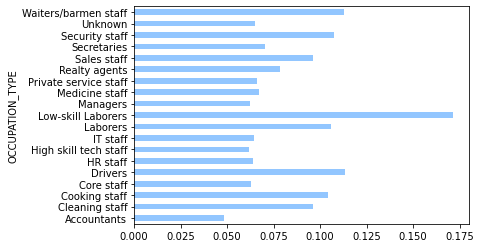

In [67]:
app_data.groupby("OCCUPATION_TYPE")["TARGET"].mean().plot.barh()
app_data.groupby("OCCUPATION_TYPE")["TARGET"].mean()

#### Take away point 7: 
1. Applicate whose OCCUPATION_TYPE is Low-skill Laborers tend to have higher default rate.
2. Applicate whose OCCUPATION_TYPE is Accountants tend to have less default rate.

# Analysis 8

## Let's Analysis ORGANIZATION_TYPE  Column

In [68]:
#app_data.groupby("ORGANIZATION_TYPE")["TARGET"].mean().plot.barh()
app_data.groupby("ORGANIZATION_TYPE")["TARGET"].mean()

ORGANIZATION_TYPE
Advertising               0.081585
Agriculture               0.104727
Bank                      0.051855
Business Entity Type 1    0.081397
Business Entity Type 2    0.085292
Business Entity Type 3    0.093000
Cleaning                  0.111538
Construction              0.116798
Culture                   0.055409
Electricity               0.066316
Emergency                 0.071429
Government                0.069788
Hotel                     0.064182
Housing                   0.079446
Industry: type 1          0.110683
Industry: type 10         0.064220
Industry: type 11         0.086538
Industry: type 12         0.037940
Industry: type 13         0.134328
Industry: type 2          0.072052
Industry: type 3          0.106162
Industry: type 4          0.101482
Industry: type 5          0.068447
Industry: type 6          0.071429
Industry: type 7          0.080337
Industry: type 8          0.125000
Industry: type 9          0.066805
Insurance                 0.057047
Ki

As ORGANIZATION_TYPE is disturbuted to multi ORGANIZATION let's drop it.

In [69]:
app_data.drop('ORGANIZATION_TYPE', axis = 1, inplace = True)

In [70]:
print(app_data.shape)
print(f'Now we have {app_data.shape[1]-1} features columns, 1 target column, and {app_data.shape[0]} rows')

(307496, 40)
Now we have 39 features columns, 1 target column, and 307496 rows


# Analysis 9

## Let's Analysis NAME_EDUCATION_TYPE  Column

NAME_EDUCATION_TYPE

NAME_EDUCATION_TYPE
Lower secondary                  0.109334
Secondary / secondary special    0.089401
Incomplete higher                0.084866
Higher education                 0.053555
Academic degree                  0.018293
Name: TARGET, dtype: float64

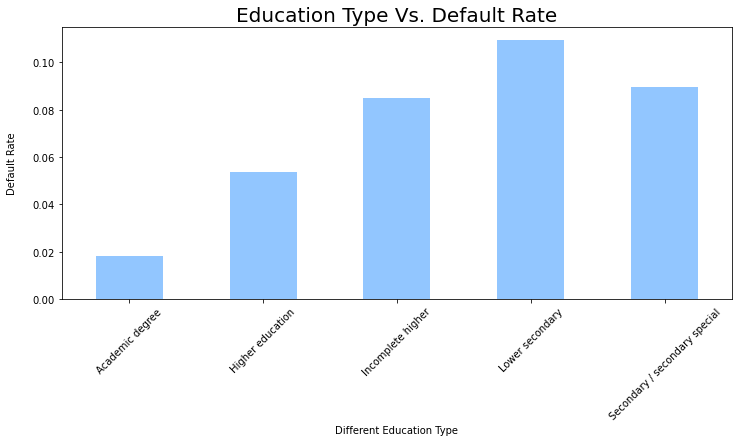

In [71]:
plt.figure(figsize=(12,5))
app_data.groupby("NAME_EDUCATION_TYPE")["TARGET"].mean().plot.bar().set_xticklabels(list(app_data.groupby("NAME_EDUCATION_TYPE")["TARGET"].mean().index), rotation=45)
plt.title("Education Type Vs. Default Rate", size = 20)
plt.xlabel("Different Education Type")

plt.ylabel("Default Rate\n")
app_data.groupby("NAME_EDUCATION_TYPE")["TARGET"].mean().sort_values(ascending =False)

#### Take away point 9:
1. Applicate whose EDUCATION_TYPE is Lower secondary tend to have higher default rate.
2. Applicate whose EDUCATION_TYPE is Academic degree tend to have less default rate.

In [72]:
list(app_data.groupby("NAME_EDUCATION_TYPE")["TARGET"].mean().index)

['Academic degree',
 'Higher education',
 'Incomplete higher',
 'Lower secondary',
 'Secondary / secondary special']

# Analysis 10

## Let's Analysis CODE_GENDER Column

In [73]:
#Dropping rows to have Valid value in column CODE_GENDER
app_data.CODE_GENDER.value_counts(normalize = True)
app_data = app_data[~(app_data.CODE_GENDER == 'XNA')]

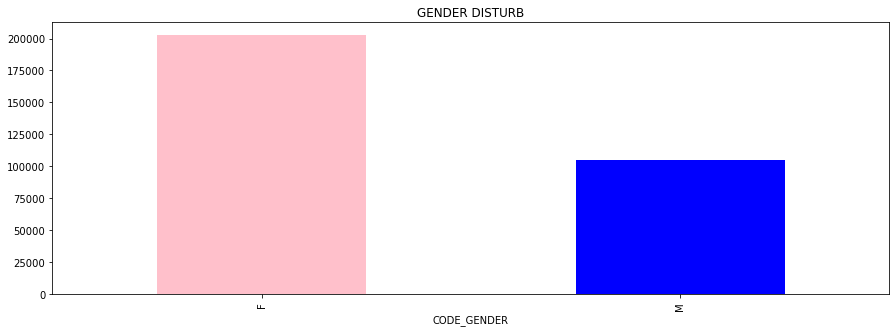

In [74]:
plt.figure(figsize=(15,5))
plt.title("GENDER DISTURB")
app_data.groupby("CODE_GENDER")["TARGET"].count().plot.bar(color=['pink',  'blue'])
plt.show()

Most Applicates are Female

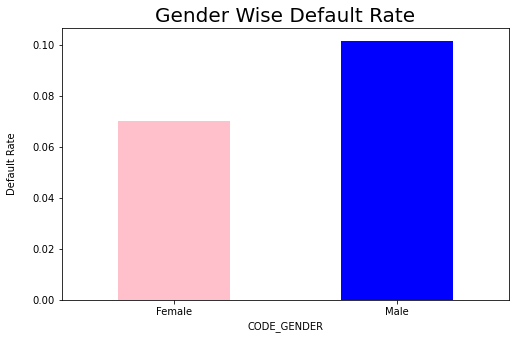

CODE_GENDER
F    0.069996
M    0.101425
Name: TARGET, dtype: float64

In [75]:
plt.figure(figsize=(8,5))
plt.title("Gender Wise Default Rate", size = 20)
plt.xlabel("\nDifferent Type Gender Applicants")

plt.ylabel("Default Rate\n")
app_data.groupby("CODE_GENDER")["TARGET"].mean().plot.bar(color=['pink',  'blue']).set_xticklabels(["Female", "Male"], rotation=360)

plt.show()
app_data.groupby("CODE_GENDER")["TARGET"].mean()

#### Take away point 10:
1. Most defaulter tend to be male.

# Analysis 11

## Lets Analysis DAYS_BIRTH columns

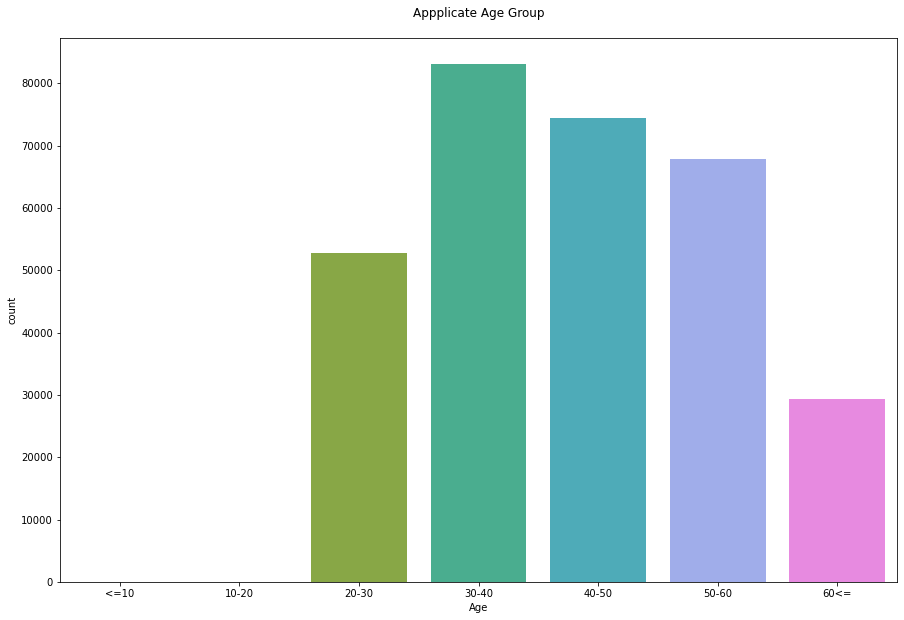

In [76]:
app_data["Age"] = app_data.DAYS_BIRTH//(-365) 
app_data["Age"] = pd.cut(app_data["Age"], [0,10,20,30,40,50,60,100000], labels = ["<=10", "10-20","20-30", "30-40","40-50", "50-60","60<="])



fig = plt.figure(figsize=(15,10))
sns.countplot(app_data['Age']).set(title="Appplicate Age Group\n")
plt.show()

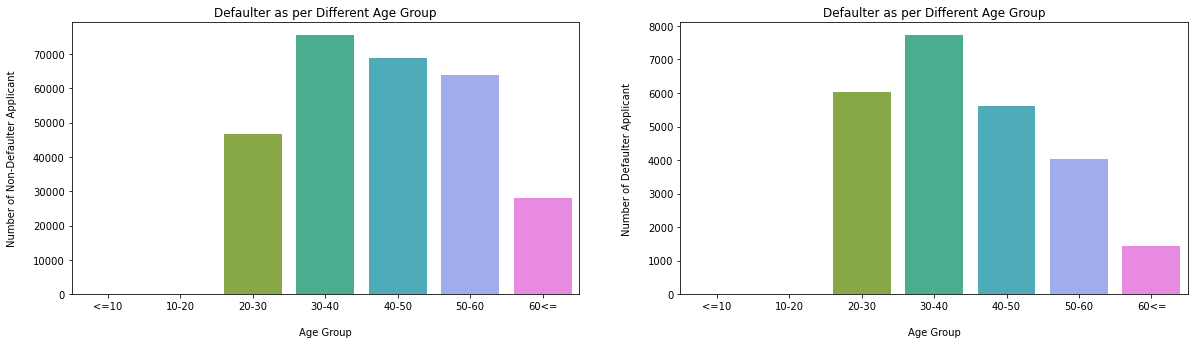

In [77]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1, 2, 1, title="Non-Defaulter\n")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter\n")

sns.countplot(app_data[app_data["TARGET"] == 0]['Age'], ax=ax1).set(title = "Defaulter as per Different Age Group",xlabel = "\nAge Group", ylabel = "Number of Non-Defaulter Applicant\n")
sns.countplot(app_data[app_data["TARGET"] == 1]['Age'], ax=ax2).set(title = "Defaulter as per Different Age Group",xlabel = "\nAge Group", ylabel = "Number of Defaulter Applicant\n")

plt.show()

#### Take away point 11:
1. Applicate whose fall under age group 30-40 tend to default more.
2. Applicate whose age is more than 60 tend to default less.

# Analysis 12

## Lets Analysis NAME_TYPE_SUITE column

Text(0.5, 1.0, 'Client Accompanied by\n')

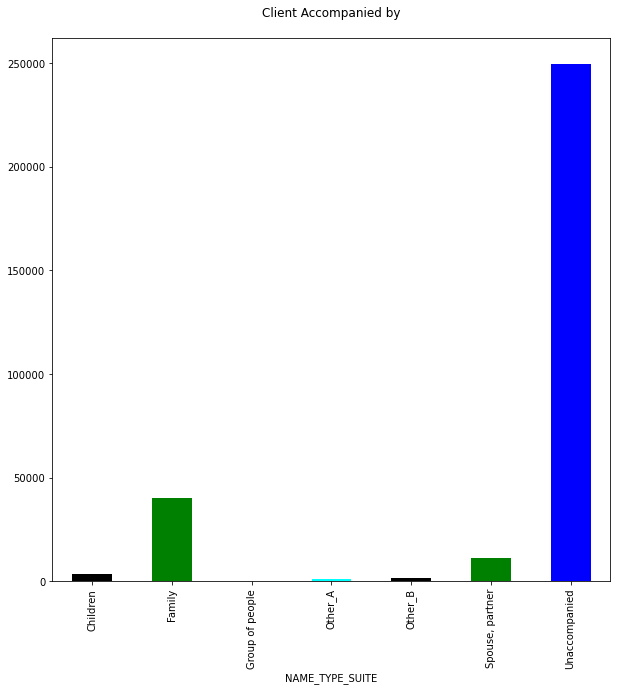

In [78]:
fig = plt.figure(figsize=(10,10))

app_data.groupby("NAME_TYPE_SUITE")["TARGET"].count().plot.bar(color=['black', 'green', 'blue', 'cyan'])
plt.title("Client Accompanied by\n")
#plt.xlabel("")
#plt.ylabel("\n")


In [79]:
app_data.groupby("NAME_TYPE_SUITE")["TARGET"].count()

NAME_TYPE_SUITE
Children             3267
Family              40147
Group of people       271
Other_A               866
Other_B              1770
Spouse, partner     11370
Unaccompanied      249801
Name: TARGET, dtype: int64

Most of the client are not accompanied

NAME_TYPE_SUITE
Other_B            0.098305
Other_A            0.087760
Group of people    0.084871
Unaccompanied      0.081693
Spouse, partner    0.078716
Family             0.074950
Children           0.073768
Name: TARGET, dtype: float64

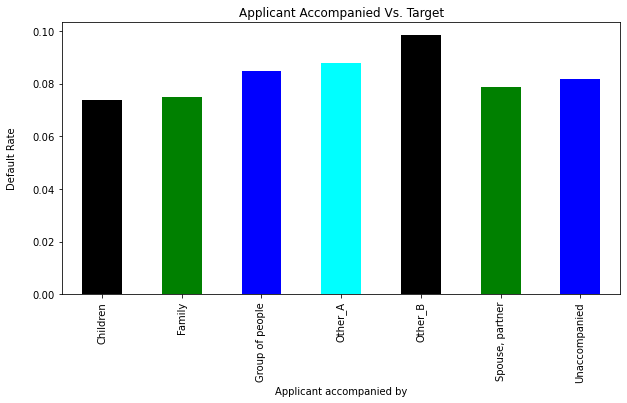

In [80]:
fig = plt.figure(figsize=(10,5))

app_data.groupby("NAME_TYPE_SUITE")["TARGET"].mean().plot.bar(color=['black',  'green', 'blue', 'cyan'])
plt.title("Applicant Accompanied Vs. Target")
plt.xlabel("Applicant accompanied by")
plt.ylabel("Default Rate\n")
app_data.groupby("NAME_TYPE_SUITE")["TARGET"].mean().sort_values(ascending = False)

#### Take away point 12:
1. Most of defaulter are accompanied by "Other_B"

# Analysis 13

## Lets Analysis NAME_INCOME_TYPE column

NAME_INCOME_TYPE

NAME_INCOME_TYPE
Maternity leave         0.400000
Unemployed              0.363636
Working                 0.095891
Commercial associate    0.074849
State servant           0.057558
Pensioner               0.053864
Businessman             0.000000
Student                 0.000000
Name: TARGET, dtype: float64

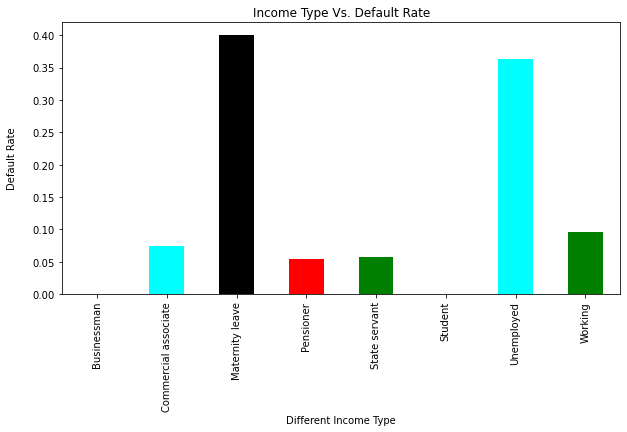

In [81]:
fig = plt.figure(figsize=(10,5))

app_data.groupby("NAME_INCOME_TYPE")["TARGET"].mean().plot.bar(color = ['green','cyan', 'black', 'red', 'green', 'blue', 'cyan'])
plt.title("Income Type Vs. Default Rate")
plt.xlabel("Different Income Type")
plt.ylabel("Default Rate\n")
app_data.groupby("NAME_INCOME_TYPE")["TARGET"].mean().sort_values(ascending = False)

#### Take away point 13:
1. Most of defaulter Income 'is from' Maternity leave 'or' Unemployed.
2. Businessman tend to have less default rate.

# Analysis 14

## Lets Analysis NAME_CONTRACT_TYPE column

NAME_CONTRACT_TYPE
Cash loans         0.083463
Revolving loans    0.054795
Name: TARGET, dtype: float64

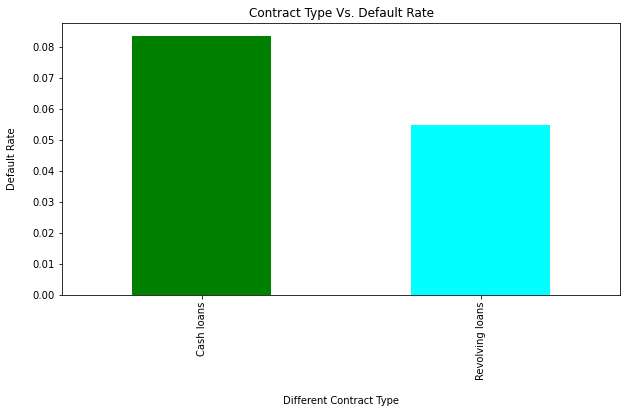

In [82]:
fig = plt.figure(figsize=(10,5))
plt.title("Contract Type Vs. Default Rate")
app_data.groupby("NAME_CONTRACT_TYPE")["TARGET"].mean().plot.bar(color = ['green','cyan'])

plt.xlabel("\nDifferent Contract Type")
plt.ylabel("Default Rate\n")
app_data.groupby("NAME_CONTRACT_TYPE")["TARGET"].mean()

#### Take away point 14:
1. Cash loan tend to have higher default Rate

# Analysis 15

## Lets Analysis WEEKDAY_APPR_PROCESS_START column

WEEKDAY_APPR_PROCESS_START
FRIDAY       0.081481
MONDAY       0.077574
SATURDAY     0.078877
SUNDAY       0.079291
THURSDAY     0.081006
TUESDAY      0.083506
WEDNESDAY    0.081613
Name: TARGET, dtype: float64

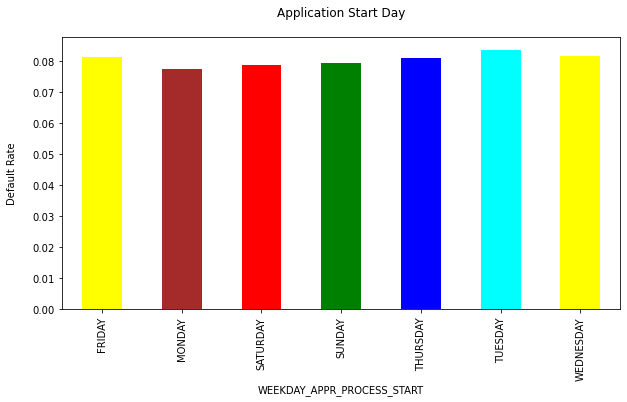

In [83]:
fig = plt.figure(figsize=(10,5))

app_data.groupby("WEEKDAY_APPR_PROCESS_START")["TARGET"].mean().plot.bar(color=['yellow','brown', 'red', 'green', 'blue', 'cyan'])
plt.title("Application Start Day\n")
#plt.xlabel("")
plt.ylabel("Default Rate\n")
app_data.groupby("WEEKDAY_APPR_PROCESS_START")["TARGET"].mean()

All days have similar default rate apart from saturday and sunday generally being holidays. this column doesn't give as much information we can drop it.

In [84]:
app_data.drop("WEEKDAY_APPR_PROCESS_START", axis = 1, inplace = True)

In [85]:
print(app_data.shape)
print(f'Now we have {app_data.shape[1]-1} features columns, 1 target column, and {app_data.shape[0]} rows')

(307492, 40)
Now we have 39 features columns, 1 target column, and 307492 rows


# Analysis 16

## Lets Analysis AMT_INCOME_TOTAL column

In [86]:
app_data.AMT_INCOME_TOTAL.describe()

count    3.074920e+05
mean     1.687961e+05
std      2.371294e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.468125e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

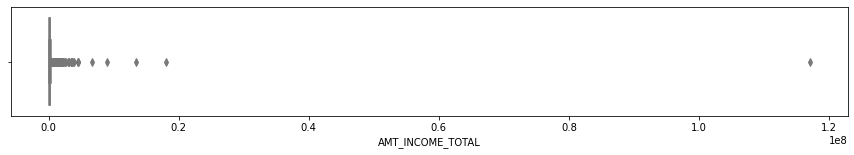

In [87]:
plt.figure(figsize=(15,2))
sns.boxplot(app_data['AMT_INCOME_TOTAL'])
plt.show()

In [88]:
# Boxplot is showing the outliers for income, Excluding values outliers

app_data = app_data[app_data['AMT_INCOME_TOTAL'] < np.nanpercentile(app_data['AMT_INCOME_TOTAL'], 98)]

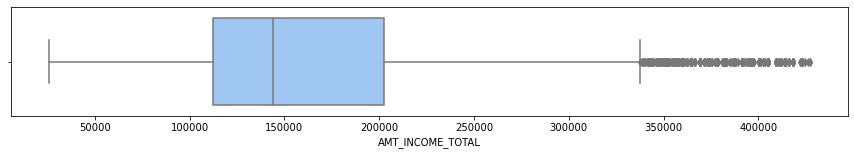

In [89]:
plt.figure(figsize=(15,2))
sns.boxplot(app_data['AMT_INCOME_TOTAL'])
plt.show()

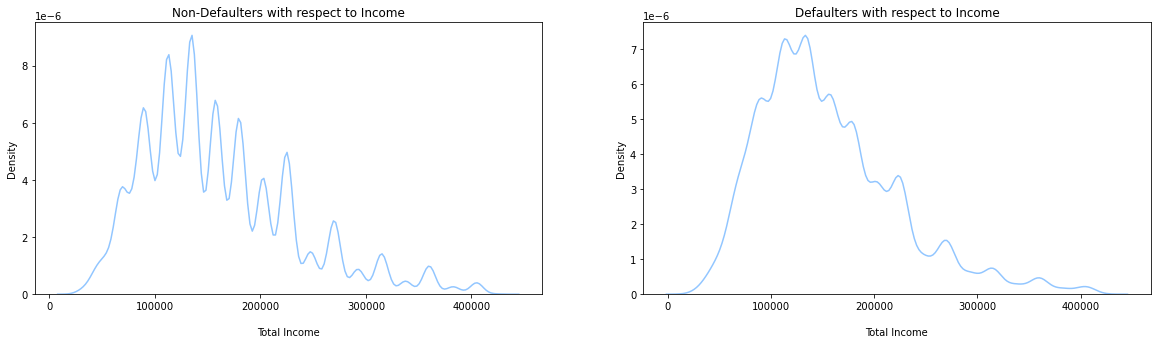

In [90]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1, 2, 1, title="Non-Defaulter\n")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter\n")

sns.kdeplot(app_data[app_data["TARGET"] == 0]['AMT_INCOME_TOTAL'], ax=ax1).set(title="Non-Defaulters with respect to Income", xlabel  = "\nTotal Income")
sns.kdeplot(app_data[app_data["TARGET"] == 1]['AMT_INCOME_TOTAL'], ax=ax2).set(title="Defaulters with respect to Income", xlabel  = "\nTotal Income")

plt.show()

#### Take away point 16:
1. We can see as Income of Client increase chance of default rate decrease. People with less income tend to default more

# Analysis 17

## Lets Analysis AMT_ANNUITY column

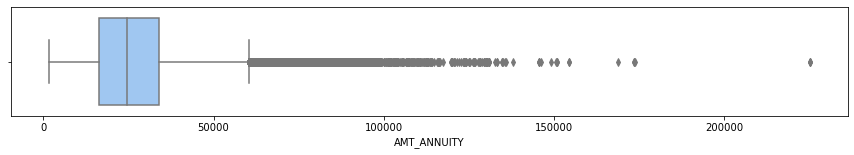

In [91]:
plt.figure(figsize=(15,2))
sns.boxplot(app_data['AMT_ANNUITY'])
plt.show()

In [92]:
# Boxplot is showing the outliers for annutiy, Excluding values outliers

app_data = app_data[app_data['AMT_ANNUITY'] < np.nanpercentile(app_data['AMT_ANNUITY'], 98)]

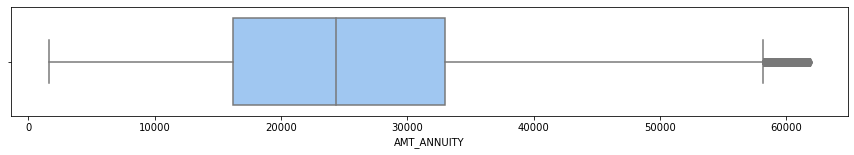

In [93]:
plt.figure(figsize=(15,2))
sns.boxplot(app_data['AMT_ANNUITY'])
plt.show()


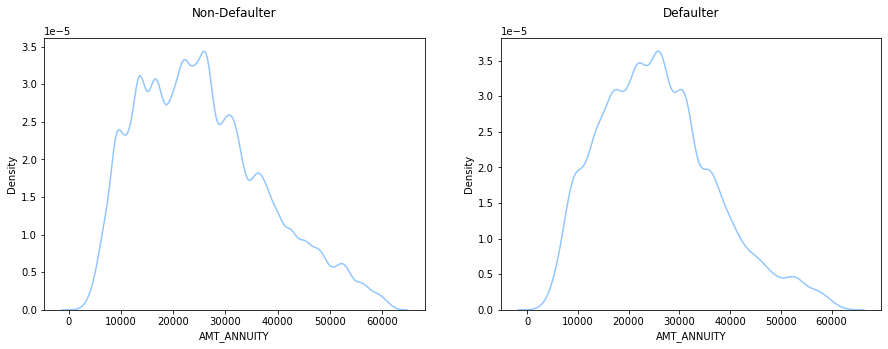

In [94]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1, 2, 1, title="Non-Defaulter\n")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter\n")

sns.kdeplot(app_data[app_data["TARGET"] == 0]['AMT_ANNUITY'], ax=ax1)
sns.kdeplot(app_data[app_data["TARGET"] == 1]['AMT_ANNUITY'], ax=ax2)

plt.show()

This column is not giving different pattern in case of both Defaulter and Non-Defaulters.
We can drop it

In [95]:
app_data.drop("AMT_ANNUITY", axis = 1, inplace = True)

In [96]:
print(app_data.shape)
print(f'Now we have {app_data.shape[1]-1} features columns, 1 target column, and {app_data.shape[0]} rows')

(295209, 39)
Now we have 38 features columns, 1 target column, and 295209 rows


In [97]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'Age'],
      dtype='object')

# Analysis 18

## Lets Analysis DAYS_EMPLOYED column

In [98]:
defaultor.DAYS_EMPLOYED

0           -637
26         -2628
40         -1262
42         -3597
81        365243
           ...  
307448     -3048
307475     -2405
307481     -3147
307489      -286
307509     -4786
Name: DAYS_EMPLOYED, Length: 24825, dtype: int64

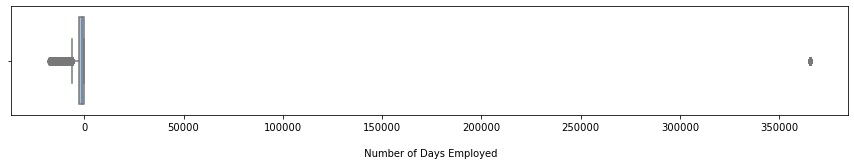

In [99]:
plt.figure(figsize=(15,2))

sns.boxplot(app_data.DAYS_EMPLOYED).set(xlabel = "\n Number of Days Employed")
plt.show()

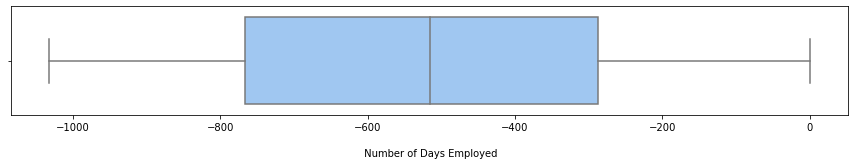

In [100]:
plt.figure(figsize=(15,2))
sns.boxplot(defaultor[(defaultor.DAYS_EMPLOYED < np.nanpercentile(defaultor.DAYS_EMPLOYED, 99)) 
                     & (defaultor.DAYS_EMPLOYED > np.nanpercentile(defaultor.DAYS_EMPLOYED, 50))].DAYS_EMPLOYED).set(xlabel = "\n Number of Days Employed")
plt.show()

#### Take away point 18:
1. Most of the client who are not working from past range of 400 to 600 days tend to default

In [101]:
#Columns with  numeric variable to check correlation.
defaulter_for_corr_columns  = app_data.dtypes[~(app_data.dtypes  == app_data.dtypes.value_counts().index[1]) 
                          & (app_data.dtypes  == app_data.dtypes.value_counts().index[0])].index

In [102]:
non_def_top = app_data[app_data.TARGET == 0]
def_top = app_data[app_data.TARGET == 1]

In [103]:
non_defaulter_corr =non_def_top.corr(method='spearman')
round(non_defaulter_corr, 2)

non_defaulter_corr_list = non_defaulter_corr.unstack()


toplist = list(non_defaulter_corr_list.sort_values(ascending=False).drop_duplicates().head(11).index)


emp_list = []

for n in toplist:
    print(n)
    
emp_list

('SK_ID_CURR', 'SK_ID_CURR')
('AMT_GOODS_PRICE', 'AMT_CREDIT')
('DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE')
('CNT_CHILDREN', 'CNT_FAM_MEMBERS')
('AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL')
('AMT_CREDIT', 'AMT_INCOME_TOTAL')
('DAYS_BIRTH', 'CNT_CHILDREN')
('DAYS_BIRTH', 'DAYS_REGISTRATION')
('CNT_FAM_MEMBERS', 'DAYS_BIRTH')
('DAYS_ID_PUBLISH', 'DAYS_BIRTH')
('LIVE_CITY_NOT_WORK_CITY', 'LIVE_REGION_NOT_WORK_REGION')


[]

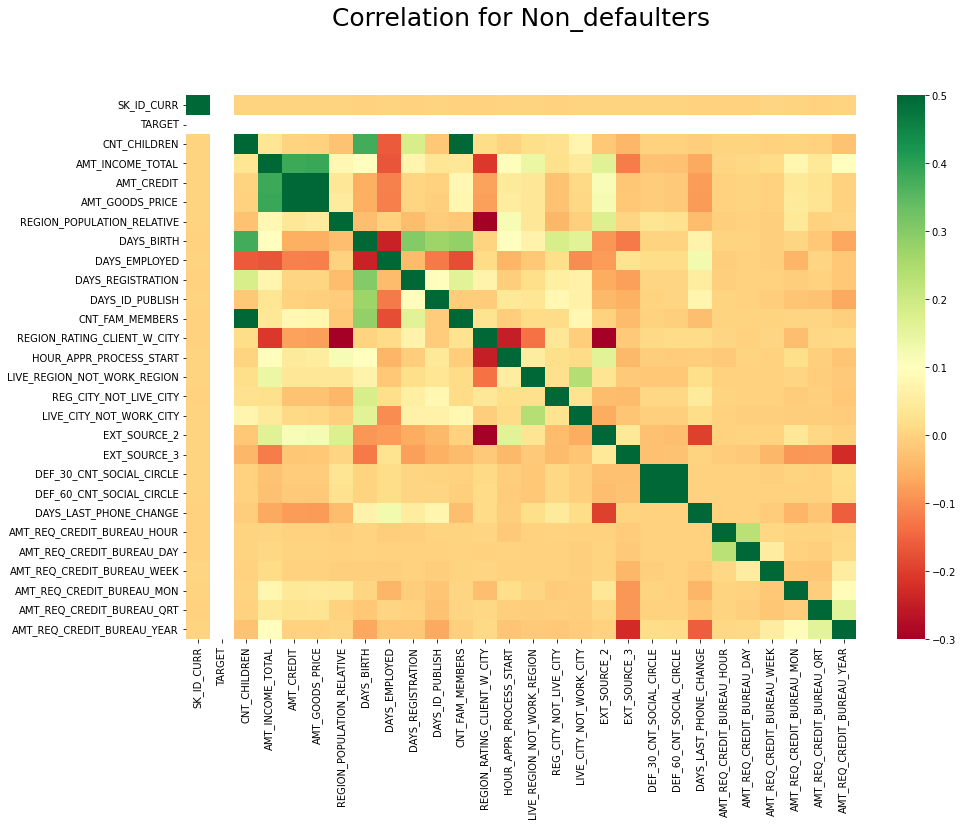

In [104]:
plt.figure(figsize=(15, 10))
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titlepad'] = 70
plt.title("Correlation for Non_defaulters")
plt.yticks(rotation=0)
sns.heatmap(data  = non_defaulter_corr, cmap="RdYlGn" ,annot=False, vmin=0.5, vmax=-0.3)
plt.show()

In [105]:
defaulter_corr =def_top.corr(method='spearman')
round(defaulter_corr, 2)

defaulter_corr_list = non_defaulter_corr.unstack()

toplist = list(defaulter_corr_list.sort_values(ascending=False).drop_duplicates().head(11).head(11).index)

emp_list = []

for n in toplist:
    print(n)
    
emp_list

('SK_ID_CURR', 'SK_ID_CURR')
('AMT_GOODS_PRICE', 'AMT_CREDIT')
('DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE')
('CNT_CHILDREN', 'CNT_FAM_MEMBERS')
('AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL')
('AMT_CREDIT', 'AMT_INCOME_TOTAL')
('DAYS_BIRTH', 'CNT_CHILDREN')
('DAYS_BIRTH', 'DAYS_REGISTRATION')
('CNT_FAM_MEMBERS', 'DAYS_BIRTH')
('DAYS_ID_PUBLISH', 'DAYS_BIRTH')
('LIVE_CITY_NOT_WORK_CITY', 'LIVE_REGION_NOT_WORK_REGION')


[]

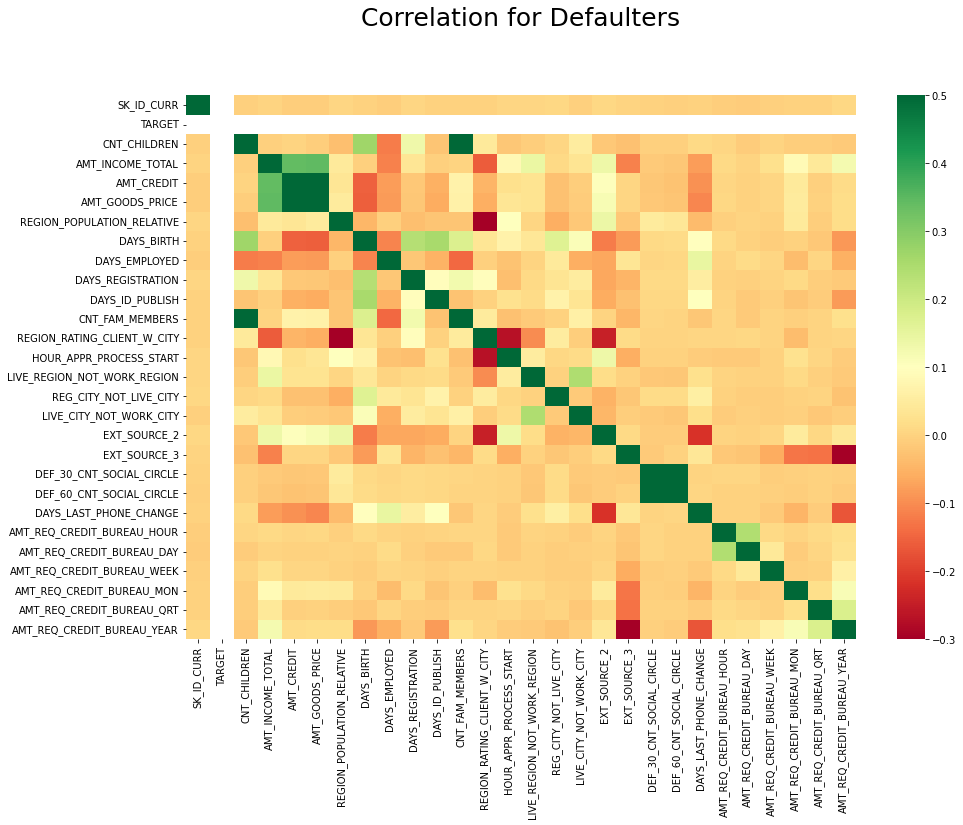

In [106]:
plt.figure(figsize=(15, 10))
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titlepad'] = 70
plt.title("Correlation for Defaulters")
plt.yticks(rotation=0)
sns.heatmap(data  = defaulter_corr , cmap="RdYlGn",annot=False, vmin=0.5, vmax=-0.3)
plt.show()

## Conclusion:

### This data is highly imbalanced as number of defaulter is very less  It is at a ratio of 8:92.

#### Hint to Identify Defaultors:

1. Applicants living With parents and in Rented apartment has high chances of being Defaultor.
2. When client's contact address does not match work address there is high chances of being Defaultor.
3. Region 2 defined by company has high chances of being Defaultor.
4. Applicant who don't own a CAR and own a REALTY has high chances of being Defaultor.
4. Applicants whose Family Status is Civil marriage and Single / not married has high chances of being Defaultor.
5. Applicant having no Children tend to have high default rate. 
6. Applicant having family member count 2 tend to have high default rate (Might be becuase they are just couples).
7. Applicate whose OCCUPATION_TYPE is Low-skill Laborers tend to have higher default rate.
8. Applicate whose EDUCATION_TYPE is Lower secondary tend to have higher default rate.
9. Most defaulter tend to be Male.
10. Applicate whose fall under age group 30-40 tend to have high chances of being Defaultor.
11. Most of defaulter are accompanied by "Other_B"
12. Most of defaulter Income is from Maternity leave or Unemployed.
13. Cash loan tend to have higher default Rate.
14. We can see as Income of Client increase chance of default rate decrease. People with less income tend to default more.
15. Most of the client who are not working from past range of 400 to 600 days tend to default.

#### Hint to Identify Non-Defaultors:

1. Applicant living in Office apartment have less Default Rate.
2. Region 1 defined by company has less defaulters.
3. Applicate whose OCCUPATION_TYPE is Accountants tend to have less default rate.
4. Applicate whose EDUCATION_TYPE is Academic degree tend to less default rate.
5. Male tend to be less Defaultor compared to Female.
6. Applicate whose age is more than 60 tend to has less chances of being Defaultor .
7. Businessman tend to have less default rate.
